# 🍷 Wine Quality Prediction

In this project, we delve into the world of Portuguese "Vinho Verde" wine. Using a dataset that captures various physicochemical properties of the wine, our aim is to predict its quality. The dataset offers a rich variety of variables, from acidity levels to alcohol content. 

**Approach:** We'll be exploring the dataset using **Regression** as the main prediction approach.

---

**Notebook Overview:**
- This notebook will walk you through:
  - Data exploration
  - Preprocessing
  - Model selection
  - Evaluation stages
  
Let's get started!  ：)

## Data Cleaning

- The provider of the wine quality dataset had provided two dataset file, with them related to red and white vinho verde wine samples, from the north of Portugal. We would want to combine the two dataset together, but before we do so, we want to look at the outlier from the respective dataset first. Since the observation data can have quite a different mean and spread due to the type different of red and white wine, if we were to remove outliers from the stacked dataset, we might be removing too much of certain type of wine data observation. 

- After we have the stacked data, we would also want to do some cleaning base on checking missing values, duplicate obseravtion, and turning text into numeric variables.

- And to finish off our cleaning process, we would also like to discover any interaction term and try too add them to our dataset.

In [1]:
# Reading in the 2 wine file, and check our dataframe using head() and dim() function:

# Note that, if we think that there are better column name to use, we can always specify our own column name by adding a option:
# col.names = c("col1", "col2", "col3") inside the read.table().

red_wine = read.table("winequality-red.csv", sep=";" , header = TRUE)
head(red_wine, 2)
dim(red_wine)

white_wine = read.table("winequality-white.csv", sep=";" , header = TRUE)
head(white_wine, 2)
dim(white_wine)


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5


[1] 1599   12

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.001,3.0,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6


[1] 4898   12

- As for now, we have 1599 observations of type red wine, and 4898 observations of type white wine

### Dataset with outliers:

In [2]:
red_wine2 = read.table("winequality-red.csv", sep=";" , header = TRUE)
white_wine2 = read.table("winequality-white.csv", sep=";" , header = TRUE)
red_wine2$type = "red"

white_wine2$type = "white"

with_outlier = rbind(red_wine2, white_wine2)

with_outlier$type = ifelse(with_outlier$type == "red", 0, 1)

with_outlier = subset(with_outlier, !duplicated(with_outlier))

In [3]:
with_outlier$Acidity_pH_interaction = with_outlier$fixed.acidity * with_outlier$pH
with_outlier$resugar_alcohol_interaction = with_outlier$residual.sugar * with_outlier$alcohol

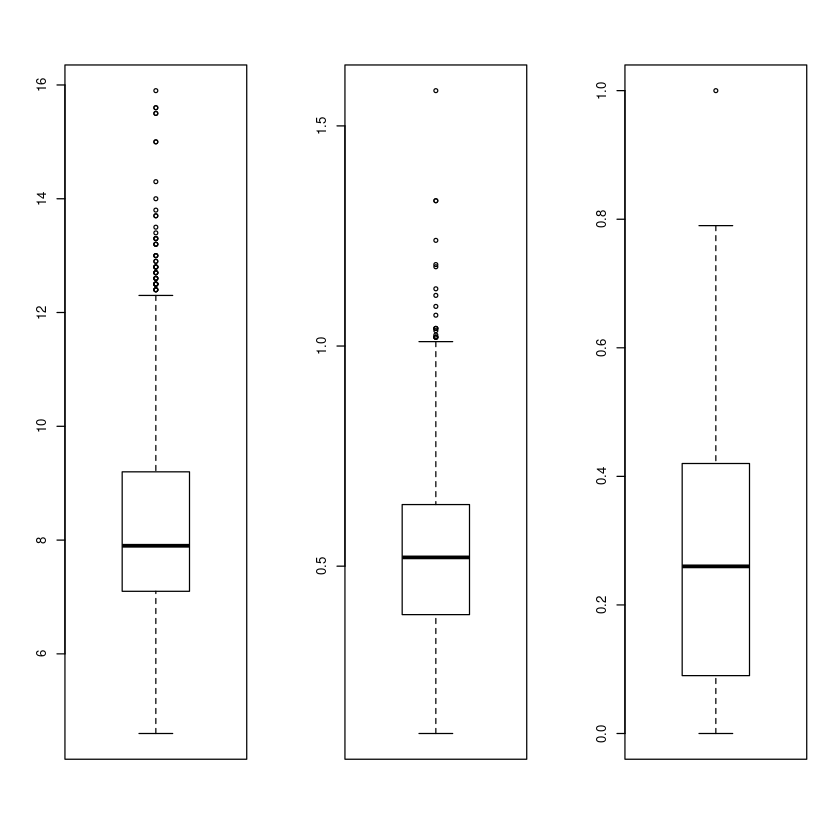

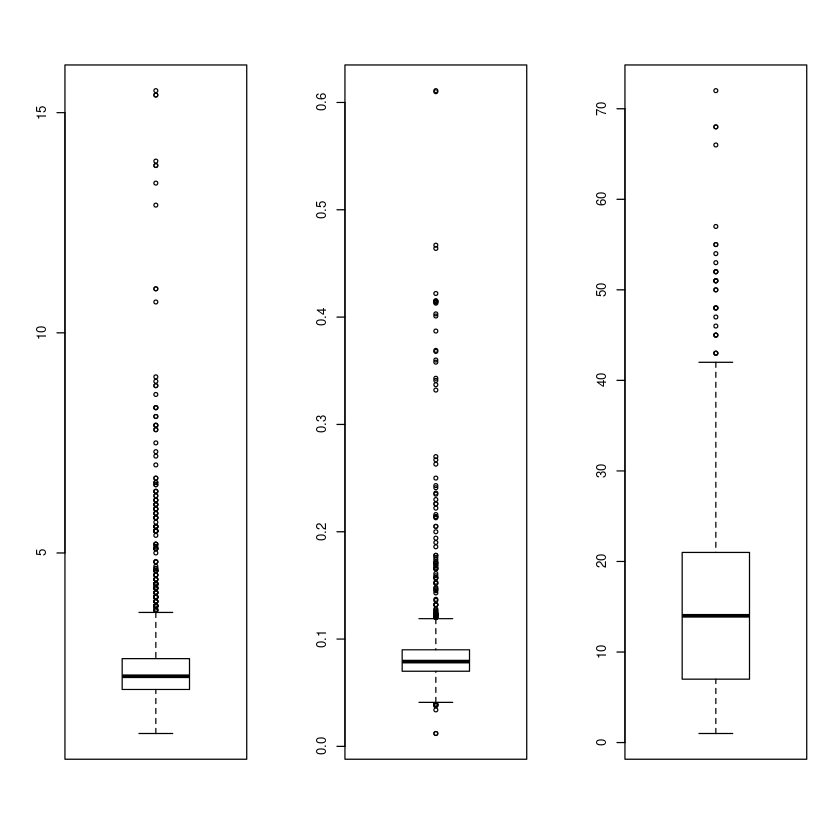

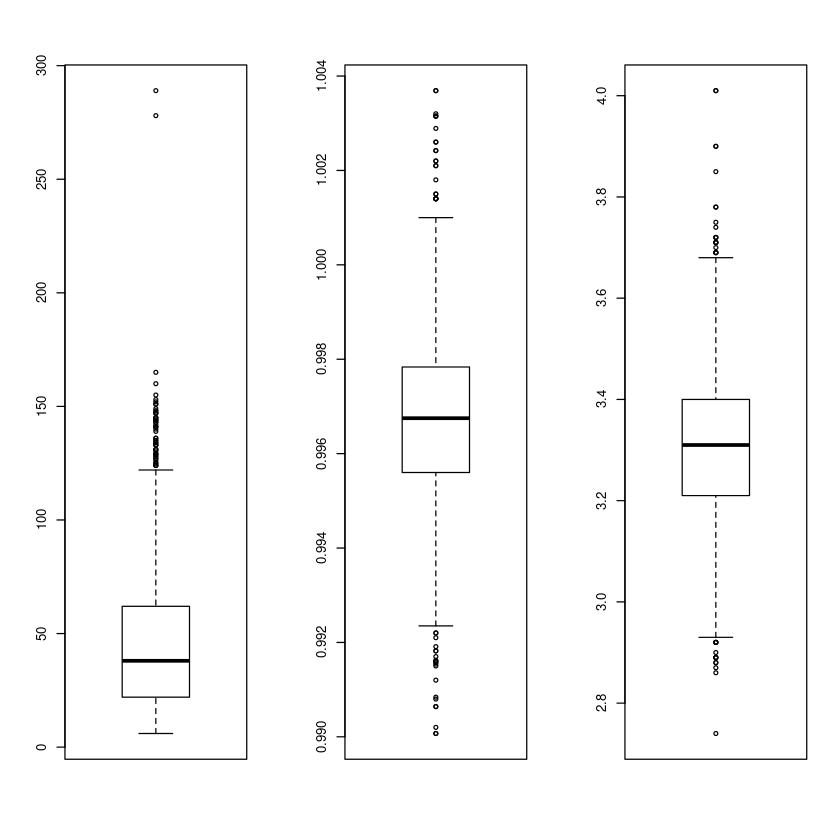

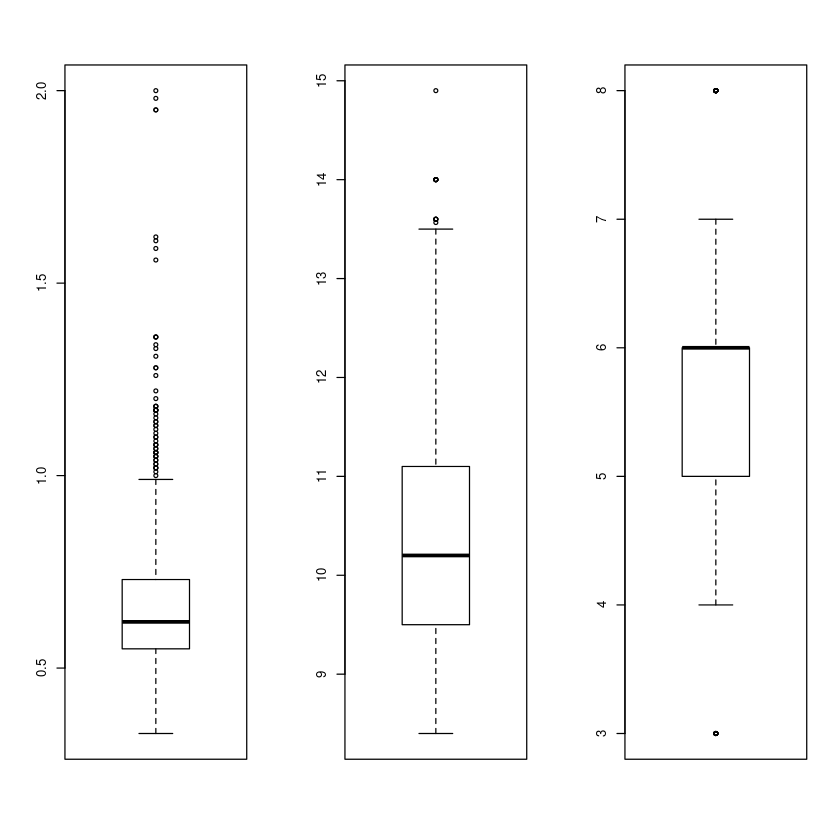

In [4]:
# boxplot for each variables to get a sense of the outliers: (before removing outliers) (red_wine)

# We want to set the plot grid size to avoid all the plot got squeeze together, and being to small:
# Lets have it as 3 plots for every rows:
par(mfrow = c(3, 1))  
par(mfcol = c(1, 3))  

invisible(lapply(1:ncol(red_wine), function(i) boxplot(red_wine[, i])))

- Before we go ahead to remove any outliers, we want to look at the boxplot of each variables. 

- We can see that there are numbers of extreme value in our dataset, so it would be a good idea to remove those extreme value as have them can result in or regression line being pull to much toward them

- Note that for our dependant variable, there are a few outliers with a quality level of 9 and 3, this means that our dataset include only a very little number of very high quality or very low quality wine, so it might be best to not include those.

In [4]:
# Removing outliers for red wine dataset:

# Here we run a for look to find the quantile number and calculate the iqr, so that we can get the upper and lower bound:
for (col in names(red_wine)[1:12]) {
  # Calculate the upper and lower bounds for outliers
  q1 = quantile(red_wine[, col], 0.25)
  q3 = quantile(red_wine[, col], 0.75)
  iqr = q3 - q1
  upper = q3 + 1.5 * iqr
  lower = q1 - 1.5 * iqr
  
  # We then remove rows where the column value is outside the bounds
  red_wine <- red_wine[! (red_wine[, col] < lower | red_wine[, col] > upper), ]
}

# checking the rows remaining now:
dim(red_wine)

[1] 1124   12

- As mentioned above, I remove the outlier before I stack the two dataset, since there can be fundamental difference in the amount of material use in the 2 type of wine, so to avoid one of the wine type being the majority of outliers, we will remove outlier from the individual dataset first, then we can stack them.

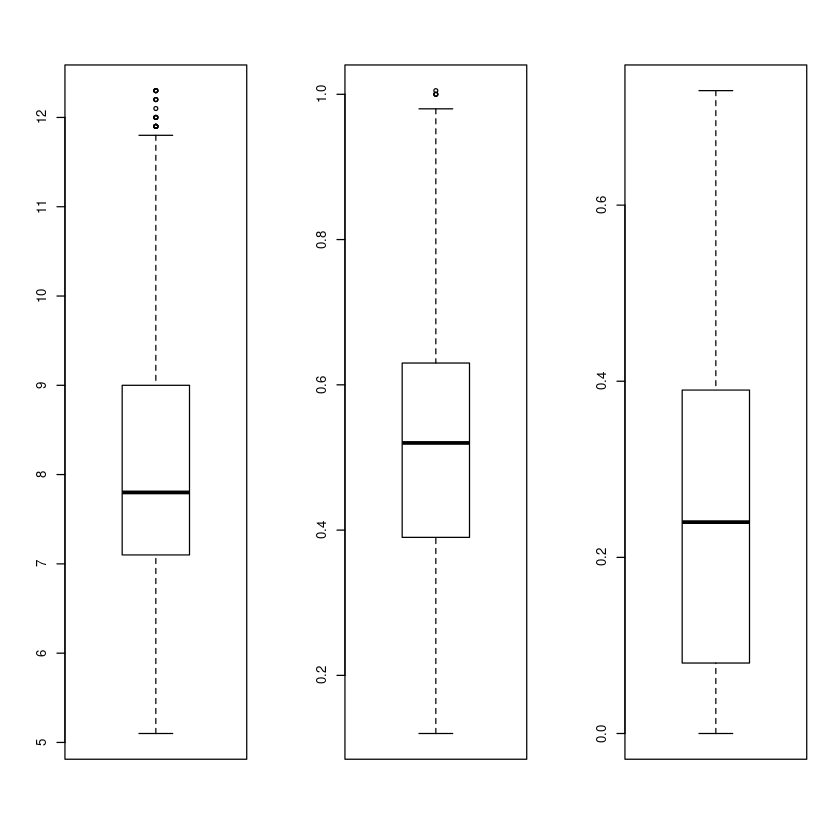

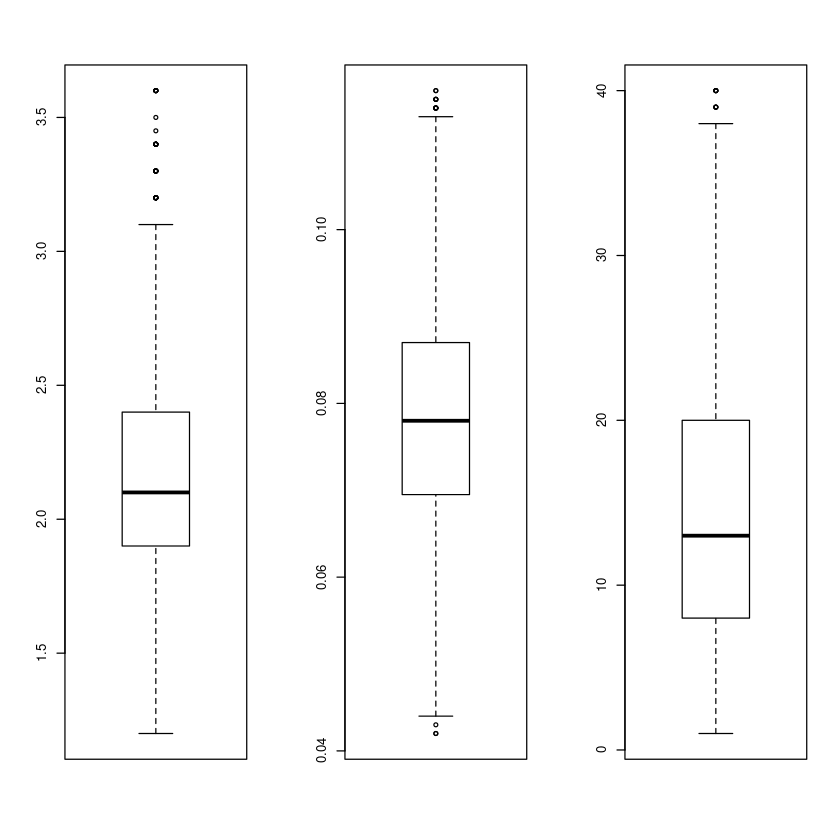

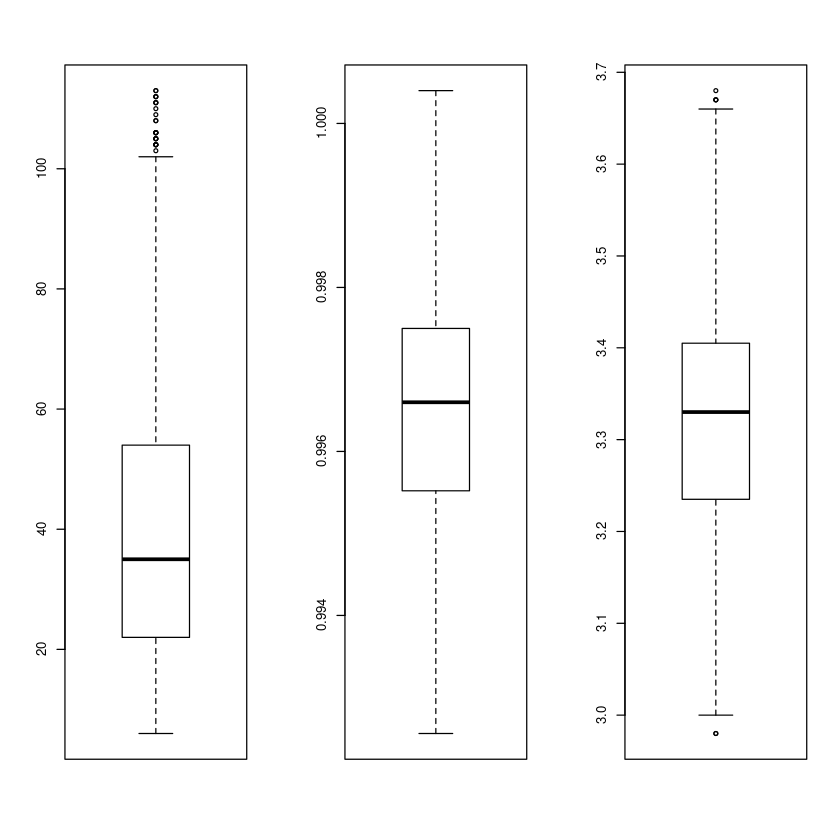

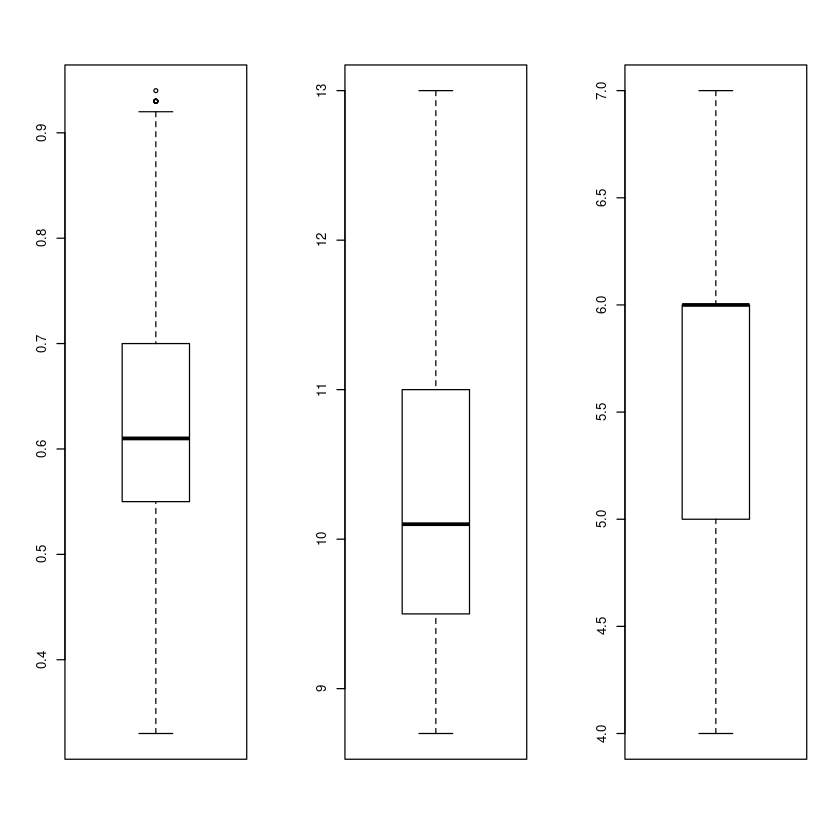

In [5]:
# boxplot for each variables beside the type column: (after removing outliers) (red_wine)

# Lets have it as 3 plots for every rows:
par(mfrow = c(3, 1))  
par(mfcol = c(1, 3))  

invisible(lapply(1:ncol(red_wine), function(i) boxplot(red_wine[, i])))

- Here we look at the boxplot after the we remove the ourliers.

In [5]:
# We will do the same now for white wine dataset

# If we want to look at the boxplot for white wine, we can do so by performing similar task from above, but we would probabilly observe very similar result

# Here we run a for look to find the quantile number and calculate the iqr, so that we can get the upper and lower bound:
for (col in names(white_wine)[1:12]) {
  # Calculate the upper and lower bounds for outliers
  q1 = quantile(white_wine[, col], 0.25)
  q3 = quantile(white_wine[, col], 0.75)
  iqr = q3 - q1
  upper = q3 + 1.5 * iqr
  lower = q1 - 1.5 * iqr
  
  # We then remove rows where the column value is outside the bounds
  white_wine = white_wine[! (white_wine[, col] < lower | white_wine[, col] > upper), ]
}

# checking the rows remaining now:
dim(white_wine)

[1] 3815   12

#### Before we want to stack the two dataset together, we want to make to we know which type of wine each observaion is:

In [6]:
# Here, we have 2 different dataset, one for red wine and one for white wine.
# So, before we merge them to form our dataset, we want to first add in a column identifying the type of the wine:

# We have the new column name as "type":

red_wine$type = "red"

white_wine$type = "white"

In [7]:
# Checking the newly added column:
head(red_wine, 2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.4,0.70,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red


In [8]:
# Now we can stack the data together:

total_wine_data = rbind(red_wine, white_wine)

In [50]:
# Checking if we get the right number of rows and column:
dim(red_wine)
dim(white_wine)
dim(total_wine_data)

[1] 1124   13

[1] 3815   13

[1] 4939   13

- The dataset we got at the end has 4939 observations in total, of which 1124 observations are type red, and 3815 observations are type white.

#### Moving on, we would now start to look for any missing values, duplicate obseravtion, and try to turn any text into numeric variables.

In [9]:
# Changing the type column from catagorical to numeric:
total_wine_data$type = ifelse(total_wine_data$type == "red", 0, 1)

- Here, we change the type column we add in to numeric value of 0 and 1, where 0 represent the type red, and 1 being the type white.

In [10]:
# Remove missing value rows:
total_wine_data = na.omit(total_wine_data)
dim(total_wine_data)

# seems like there are no missing values

[1] 4939   13

- Here, we want to remove any rows that contains missing value, but it turns out that there aren't any missing value in our dataset.

In [11]:
# remove duplicate rows:
total_wine_data = subset(total_wine_data, !duplicated(total_wine_data))
dim(total_wine_data)

[1] 4015   13

- Here, we want to remove any duplicate rows, these row may be due to the fact that 2 almost indentical wine are being tested and measured, or it could just simply be input error.

#### Now we want to add some interaction term to our dataset:

As adding interaction terms can help us in capturing more complex relationships between variables that may not be fully explained by their individual effects, we want to try to identify any use interaction between interaction between variables. 

Fixed acidity * pH: This interaction term could be useful that capture the relationship between acidity and pH. Wines with high fixed acidity and low pH might be perceived as sour or acidic, while wines with low fixed acidity and high pH might be perceived as flat or dull. 

Residual sugar * alcohol: This interaction term could could be useful that capture the relationship between sweetness and alcohol content.Wines with high residual sugar and low alcohol might be perceived as sweet but lack some taste of being a true wine(?), while wines with high residual sugar and high alcohol might be perceived as rich.

Both of the interaction term might be effecting the resulting quality of the wine, base on what each term is giving the tester a different tast feeling.



In [12]:
# Adding the interaction term column:

total_wine_data$Acidity_pH_interaction = total_wine_data$fixed.acidity * total_wine_data$pH
total_wine_data$resugar_alcohol_interaction = total_wine_data$residual.sugar * total_wine_data$alcohol

In [12]:
# Checking the final total_wine_data:
head(total_wine_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type,Acidity_pH_interaction,resugar_alcohol_interaction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0,25.974,17.86
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0,24.960,25.48
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0,25.428,22.54
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,0,35.392,18.62
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,0,25.974,16.92
7,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5,0,26.070,15.04


####  Note: Run the entire notebook and the *total_wine_data* will be the final cleaned dataset for us to do the analysis

## preliminary analyses

In [17]:
dim(total_wine_data)

[1] 4015   15

After removing the outliers and missing values, the dataset's dimensions are 4015 x 15, where 4015= observations, and 15 represents the amount of variables. 

The dataset contains 14 predictors, and our dependent variable is “quality”, which spans from 4-7, after the removal of outliers. 



In [18]:
summary(total_wine_data)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 4.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2200   1st Qu.:0.2500   1st Qu.: 1.800  
 Median : 6.900   Median :0.2800   Median :0.3100   Median : 2.700  
 Mean   : 7.116   Mean   :0.3249   Mean   :0.3053   Mean   : 5.012  
 3rd Qu.: 7.600   3rd Qu.:0.3800   3rd Qu.:0.3800   3rd Qu.: 7.600  
 Max.   :12.300   Max.   :1.0050   Max.   :0.7300   Max.   :20.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01500   Min.   : 1.00       Min.   :  6.0        Min.   :0.9871  
 1st Qu.:0.03700   1st Qu.:17.00       1st Qu.: 75.0        1st Qu.:0.9920  
 Median :0.04600   Median :28.00       Median :115.0        Median :0.9944  
 Mean   :0.05069   Mean   :29.72       Mean   :113.6        Mean   :0.9943  
 3rd Qu.:0.05900   3rd Qu.:41.00       3rd Qu.:152.0        3rd Qu.:0.9965  
 Max.   :0.11600   Max.   :79.00       Max.   :253.0   

#### The summary statistics for each variable provides the distribution type, including mean, range, interquartile range (3rd Qu - 1st Qu), minimum value and maximum value. 

#### For the variable ```quality```: this variable is described as a discrete variable, since it takes numbers that are whole numbers, and nothing in between. 

#### It's worth noting that the variable ```density``` only ranged from 0.98 to 1.



#### Our dataset is a cross sectional data since our observations are taken at a single point in time. The dataset focuses on specific variants of Portuguese wine.

In [19]:
min(total_wine_data$quality)
max(total_wine_data$quality)

[1] 4

[1] 7

In [4]:
table(total_wine_data$quality)
table(total_wine_data$type)

ERROR: Error in table(total_wine_data$quality): object 'total_wine_data' not found


#### It is important to note that before the removal of outliers, the variable ```quality``` ranged from 0 to 9. And after the romoval of outliers, it now ranges from 4 to 7.

#### Variable ```type``` is a binary variable. Which helps identify what type of wine it is. In out setting, ```0``` stands for red wine, and ```1``` stands for white wine.

In [21]:
var(total_wine_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type,Acidity_pH_interaction,resugar_alcohol_interaction
fixed.acidity,1.25477159,0.0451576108,3.433486e-02,-0.708618498,1.006027e-02,-5.472488522,-22.19475565,1.374180e-03,-2.968843e-02,4.072402e-02,-1.198828e-01,-0.0591106532,-0.2425497124,3.822817775,-7.31659148
volatile.acidity,0.04515761,0.0229276338,-8.774485e-03,-0.141242021,1.763195e-03,-0.966882016,-3.98405565,1.424072e-04,6.705726e-03,5.241870e-03,-1.583496e-02,-0.0272067304,-0.0465688499,0.193989604,-1.40496027
citric.acid,0.03433486,-0.0087744855,1.416852e-02,0.061041651,-4.544868e-04,0.320630801,1.55755338,-8.905137e-06,-5.465015e-03,-3.958139e-04,9.408049e-03,0.0119589302,0.0140595643,0.071225114,0.59829659
residual.sugar,-0.70861850,-0.1412420210,6.104165e-02,19.259238786,-1.498173e-02,33.029668242,126.66992036,6.288315e-03,-1.626282e-01,-1.092387e-01,-1.678584e+00,-0.2226182583,0.6671429542,-3.390311802,184.05919868
chlorides,0.01006027,0.0017631951,-4.544868e-04,-0.014981735,3.564515e-04,-0.106683700,-0.48507780,3.113826e-05,7.944128e-04,9.648894e-04,-7.443842e-03,-0.0038008047,-0.0065324863,0.038287444,-0.17939290
free.sulfur.dioxide,-5.47248852,-0.9668820158,3.206308e-01,33.029668242,-1.066837e-01,261.067706986,667.98399267,1.017278e-03,-4.817391e-01,-4.525325e-01,-2.851137e+00,0.9429262525,3.5316619106,-20.901426451,308.05249043
total.sulfur.dioxide,-22.19475565,-3.9840556545,1.557553e+00,126.669920364,-4.850778e-01,667.983992669,3088.21617558,1.267910e-03,-2.127056e+00,-2.073087e+00,-1.449701e+01,-0.8866085140,17.1096661684,-86.214036160,1173.76033039
density,0.00137418,0.0001424072,-8.905137e-06,0.006288315,3.113826e-05,0.001017278,0.00126791,7.902376e-06,5.114789e-05,9.750373e-05,-2.324518e-03,-0.0007187257,-0.0005237732,0.004826115,0.05243435
pH,-0.02968843,0.0067057259,-5.465015e-03,-0.162628182,7.944128e-04,-0.481739080,-2.12705624,5.114789e-05,2.150306e-02,4.567260e-03,7.832336e-04,0.0004278736,-0.0233455633,0.055238434,-1.59542893
sulphates,0.04072402,0.0052418701,-3.958139e-04,-0.109238677,9.648894e-04,-0.452532463,-2.07308724,9.750373e-05,4.567260e-03,1.393609e-02,-8.266111e-03,0.0037600751,-0.0259880871,0.164102848,-1.15520572


#### The code above represents the covariance variance matrix of our variables.

In [ ]:
pairs(total_wine_data)

In [ ]:
cor(total_wine_data[1:13])

The code above represents the correlation matrix of our varibles. 

We can notice that variable ```alcohol``` and ```density```, ```type``` and ```total.sulfur.dioxide```, ```type``` and ```volatile acidity```, ```chlorides``` and ```volatile.acidity``` are highly correlated. We should be careful later for the regressions.

All other variable correlations appear to be low or moderate.

And note that for the correlation between quality and the some independent variables like fixed.acidity, residual.sugar and pH is relatively low. This could be signifying that these variables may not be as relevant?  We might want to look at these later on when we were select the preditor for our regression model.

## Model Selection

Before we begin our model selection process, we want to make sure that we have a test dataset to measure the performance of our prediction models in latter steps. Specifically, we will be splitting our existing dataset into training and testing data, in which the split will be a 70% - 30% split. This is the split that as our group had decided during the first phase of the project. 

In [13]:
# Here we split the data by creating an true false table, where true has a probability of 70%:

# If we want to keep our output to be consistence, we will need to set the random seed.
set.seed(26)

sample = sample(c(TRUE, FALSE), nrow(total_wine_data), replace=TRUE, prob=c(0.7,0.3))
train  = total_wine_data[sample, ]
test   = total_wine_data[!sample, ]

In [14]:
# Checking the split has been done successfully:

dim(train)/dim(total_wine_data)
dim(test)/dim(total_wine_data)

[1] 0.7026152 1.0000000

[1] 0.2973848 1.0000000

In [15]:
# Here, we prepare another set of data in which this version of data contains outliers we previously removed.
# We can use these data to do a robustness check for our models, and see how it performs.
set.seed(26)
sample = sample(c(TRUE, FALSE), nrow(with_outlier), replace=TRUE, prob=c(0.7,0.3))
train2  = with_outlier[sample, ]
test_2   = with_outlier[!sample, ]

### Now that we have training and test data ready, we will first start by using a linear regression model to fit our data.

Recall that our group's prediction problem is of type regression, where we want to use input variables in the dataset to predict the quality of a wine with a scale from 1 to 10, so **quality** will be our target variable.

Lets start with a linear regression model that includes all the variables in our dataset:

In [16]:
lm1  = lm(quality ~ ., data = train)
summary(lm1)


Call:
lm(formula = quality ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.38097 -0.42018 -0.00706  0.46052  1.91710 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.098e+02  2.399e+01   4.579 4.88e-06 ***
fixed.acidity               -3.609e-01  2.849e-01  -1.267  0.20527    
volatile.acidity            -9.531e-01  1.330e-01  -7.168 9.68e-13 ***
citric.acid                 -7.411e-02  1.341e-01  -0.553  0.58044    
residual.sugar               4.895e-02  3.026e-02   1.618  0.10587    
chlorides                   -2.039e+00  1.304e+00  -1.564  0.11795    
free.sulfur.dioxide          5.928e-03  1.161e-03   5.107 3.49e-07 ***
total.sulfur.dioxide        -1.232e-03  4.715e-04  -2.613  0.00903 ** 
density                     -1.067e+02  2.405e+01  -4.437 9.49e-06 ***
pH                          -3.369e-01  6.260e-01  -0.538  0.59044    
sulphates                    1.150e+00  1.277e-01   9

- With the above multiple linear regression that included all the independent variables, we have a r squared of 28.45%, which means about 28% of the variation in Y (quality) can be explained by our independent variables.


- Furthermore, our F-statistics value is 79.71, which is greater than F critical. This can be illustrating that the model is significant.


- And looking at the p-value for each independent variable, we can see that only half of the independent variables are statistically significant in predicting Y(quality of wine). However, we will need to keep in mind that there are issues like collinearity that can cause problems in interpreting the coefficients, so what we are going to do next is to perform variable selection techniques together with cross valiadation to try to obtain the best model possible. 

#### But before we begin the cross validation process, we can first  indirectly estimate test error rate by looking at how Cp, BIC, and Adjusted R2 change with every addition of preditor:

In [17]:
library(leaps)
regfit.full = regsubsets(quality~., train, nvmax = 14)
reg.summary = summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(quality ~ ., train, nvmax = 14)
14 Variables  (and intercept)
                            Forced in Forced out
fixed.acidity                   FALSE      FALSE
volatile.acidity                FALSE      FALSE
citric.acid                     FALSE      FALSE
residual.sugar                  FALSE      FALSE
chlorides                       FALSE      FALSE
free.sulfur.dioxide             FALSE      FALSE
total.sulfur.dioxide            FALSE      FALSE
density                         FALSE      FALSE
pH                              FALSE      FALSE
sulphates                       FALSE      FALSE
alcohol                         FALSE      FALSE
type                            FALSE      FALSE
Acidity_pH_interaction          FALSE      FALSE
resugar_alcohol_interaction     FALSE      FALSE
1 subsets of each size up to 14
Selection Algorithm: exhaustive
          fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1  ( 1 )  " 

In [18]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

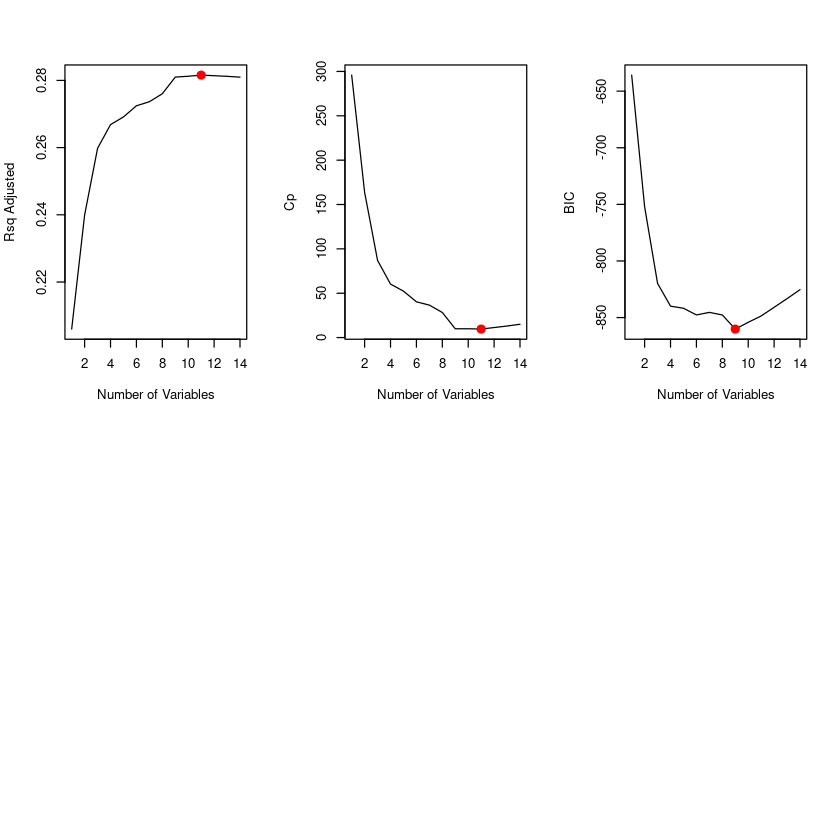

In [19]:
par(mfrow = c(2,3))
cxlab = "Number of Variables" 
plot(reg.summary$adjr2, xlab = cxlab, ylab = "Rsq Adjusted", type="l")
ind = which.max(reg.summary$adjr2) 
points(ind, reg.summary$adjr2[ind], col = "red", cex = 2, pch = 20)

plot(reg.summary$cp, xlab = cxlab, ylab = "Cp",type = "l")
ind = which.min(reg.summary$cp) 
points(ind, reg.summary$cp[ind], col = "red", cex = 2, pch = 20) 

plot(reg.summary$bic, xlab = cxlab, ylab = "BIC", type = "l")
ind = which.min(reg.summary$bic) 
points(ind, reg.summary$bic[ind], col = "red", cex = 2, pch = 20) 

From the plot above, we can see that:
- with the value of Adjusted R2, it suggest that the optimal number of variables are **11**.

- with the value of Cp, it suggest that the optimal number of variables are **11**.

- with the value of BIC, it suggest that the optimal number of variables are **9**.

It seems clear that the optimal model should have a number of preditors in the range of 9 to 11. Now, lets perform a 10 fold cross validation, as it can be providing a more accurate assessment of how our multiple linear regression model will perform on newly unseen data.

In [20]:
# To perform cross-validation at each model size, we have to do best subset selection within each of the k training sets.
# In the leaps library, we can use the regsubsets() function to perfrom best subset selection
library(leaps)
predict.regsubsets = function(object, newdata, id, ...){
    form = as.formula(object$call[[2]])    
    mat = model.matrix(form, newdata)
    coefi = coef(object, id = id)
    xvars = names(coefi)
    mat[, xvars] %*% coefi
}

In [21]:
# As alway, we want to first set a seed for consistency:
set.seed(26)

# First, we will ceate a vector that allocates observations to one of the 10 k folds
k = 10
folds = sample(1:k, nrow(train), replace = TRUE) # sample into folds
cv.errors = matrix(NA, k, 14, dimnames = list(NULL, paste(1:14))) # create a amtrix to store the results

In [22]:
# Then, by using a nested for loop, we can then perform cv on each of the k training sets:
# Note that the metric use here would be MSE

for(j in 1:k){
    best.fit = regsubsets(quality ~ ., data = train[folds != j, ], nvmax = 14)
    for (i in 1:14){
        pred = predict(best.fit, train[folds == j, ], id = i)
        cv.errors[j, i] = mean((train$quality[folds == j] - pred)^2)
    }
}

In [23]:
mean.cv.errors = apply(cv.errors, 2, mean) # average over columns of matrix
mean.cv.errors

1         2         3         4         5         6         7         8 
0.4476858 0.4284995 0.4174982 0.4135392 0.4142211 0.4108269 0.4129938 0.4123418 
        9        10        11        12        13        14 
0.4063556 0.4070337 0.4064399 0.4068673 0.4070963 0.4071016

In [24]:
which.min(mean.cv.errors)

9 
9

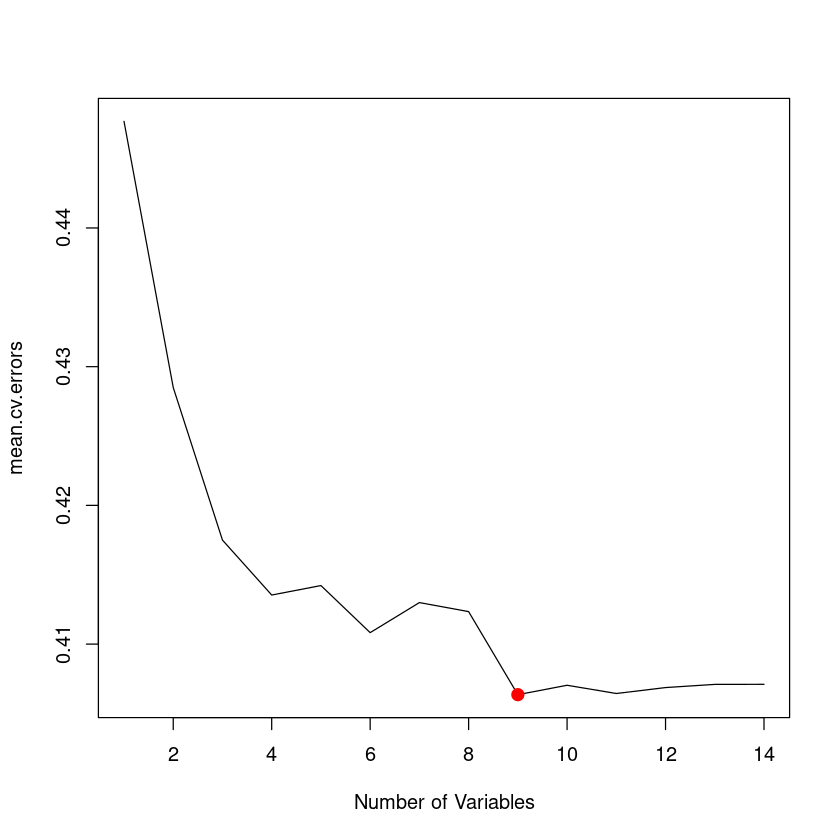

In [113]:
plot(mean.cv.errors, xlab = cxlab, type="l")
ind = which.min(mean.cv.errors)
points(ind, mean.cv.errors[ind], col = "red", cex = 2, pch = 20)

From the combined result of best subset selection and 10 folds cross valiadation, oue results suggest that the optimal number of predictor to use is 9 (This agree with what we have above from the indirectly estimate of test rate error). 

Together with the table generated from best subset selection algorithem, we can see that the best predictor to use for our linear regression model are:
- fixed.acidity, volatile.acidity, residual.sugar,  free.sulfur.dioxide, total.sulfur.dioxide, density, sulphates, alcohol, and  Acidity_pH_interaction

Also, we can see that our model have a estimated test error rate (estimate of MSE) of **0.4063**.


#### Now,  we can use a linear regression model again to fit our data, but this time with the best model we arrival above:

In [25]:
quality_form = quality ~ fixed.acidity + volatile.acidity + residual.sugar + free.sulfur.dioxide + total.sulfur.dioxide + density + sulphates + alcohol + Acidity_pH_interaction
lm2  = lm(quality_form, data = train)
summary(lm2)


Call:
lm(formula = quality_form, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4259 -0.4294 -0.0074  0.4610  1.9116 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             98.357880  18.288647   5.378 8.15e-08 ***
fixed.acidity           -0.214769   0.045761  -4.693 2.82e-06 ***
volatile.acidity        -0.852340   0.109711  -7.769 1.10e-14 ***
residual.sugar           0.048521   0.007394   6.562 6.28e-11 ***
free.sulfur.dioxide      0.006384   0.001120   5.700 1.33e-08 ***
total.sulfur.dioxide    -0.001707   0.000378  -4.515 6.59e-06 ***
density                -96.588936  18.351837  -5.263 1.52e-07 ***
sulphates                1.174956   0.126415   9.294  < 2e-16 ***
alcohol                  0.194915   0.025772   7.563 5.30e-14 ***
Acidity_pH_interaction   0.104540   0.018379   5.688 1.42e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6361 on 2811 degrees o

- With the new model, we can see from the resulting p-values for all the predictors that all the predictor in the model are statistically significant in predicting Y(quality of wine).


- It is also important to note the the R^2 for this model remains roughly the same. Intuitivally this agrees with prediction theory, since R^2 mechanically increases as more variables are added. Since we removed some of the variables in the model, it did not have a significant impact on R^2. 



#### Before we move on to the next model, lets see how the multi linear regression model perform with data that has more outliers:

In [31]:
# Again, using a 10 fold cross validation, lets see what the estimated test error rate will be:

set.seed(26)
k = 10
folds = sample(1:k, nrow(train2), replace = TRUE) 
cv.errors = matrix(NA, k, 14, dimnames = list(NULL, paste(1:14))) 

for(j in 1:k){
    best.fit = regsubsets(quality ~ ., data = train2[folds != j, ], nvmax = 14)
    for (i in 1:14){
        pred = predict(best.fit, train2[folds == j, ], id = i)
        cv.errors[j, i] = mean((train2$quality[folds == j] - pred)^2)
    }
}

In [32]:
mean.cv.errors = apply(cv.errors, 2, mean) # average over columns of matrix
mean.cv.errors
which.min(mean.cv.errors)

1         2         3         4         5         6         7         8 
0.6048263 0.5604870 0.5525287 0.5547594 0.5492589 0.5429553 0.5412153 0.5413350 
        9        10        11        12        13        14 
0.5369797 0.5360550 0.5376167 0.5376447 0.5374452 0.5372751

10 
10

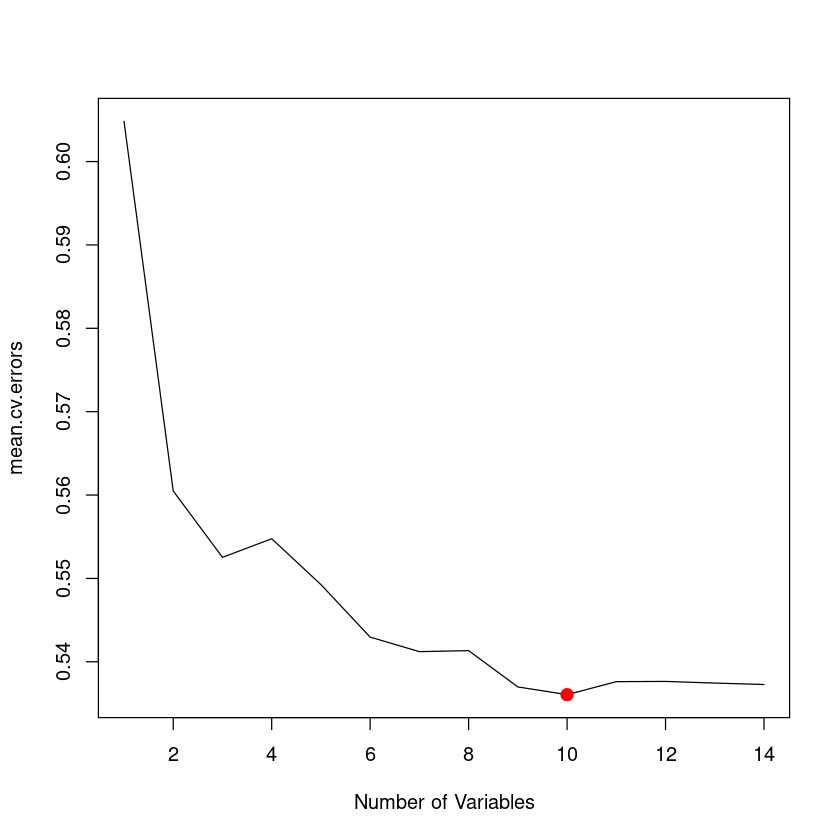

In [33]:
plot(mean.cv.errors, xlab = cxlab, type="l")
ind = which.min(mean.cv.errors)
points(ind, mean.cv.errors[ind], col = "red", cex = 2, pch = 20)

It turns out that with more outliers, the model will have result in a higher estimated error rate, and at the same time, the optimal number of predictors change as well.

### Moving on, we are also interested in how would a decision tree model fit our data:

Once again, we will start off by fitting a model that includes all the variables in our dataset:

In [140]:
library(tree)
tree.wine  = tree(quality ~ ., train)
summary(tree.wine)


Regression tree:
tree(formula = quality ~ ., data = train)
Variables actually used in tree construction:
[1] "alcohol"          "volatile.acidity"
Number of terminal nodes:  4 
Residual mean deviance:  0.4344 = 1224 / 2817 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.364000 -0.364800 -0.002591  0.000000  0.635200  1.635000 

- AS we can see, perhaps surprisingly, that out of the total 14 predictors in our dataset, only 2 variables were used to create this tree. 


- The Rss for this model, which is the Residual mean deviance is **0.4344**


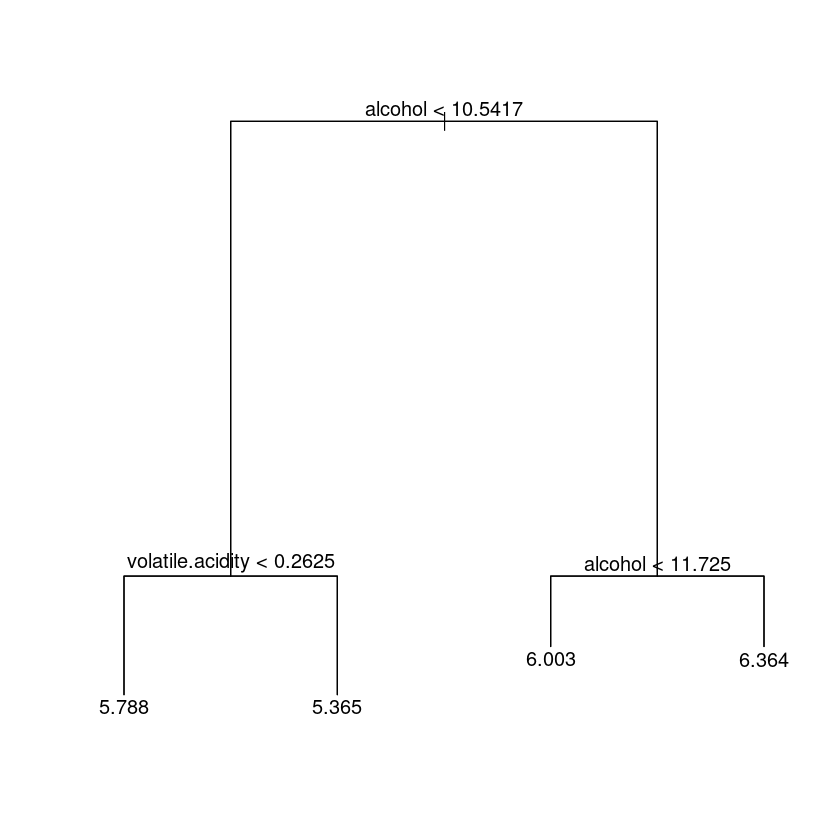

In [141]:
# let's plot the tree and see the shape of the tree:
plot(tree.wine)
text(tree.wine, pretty = 0)

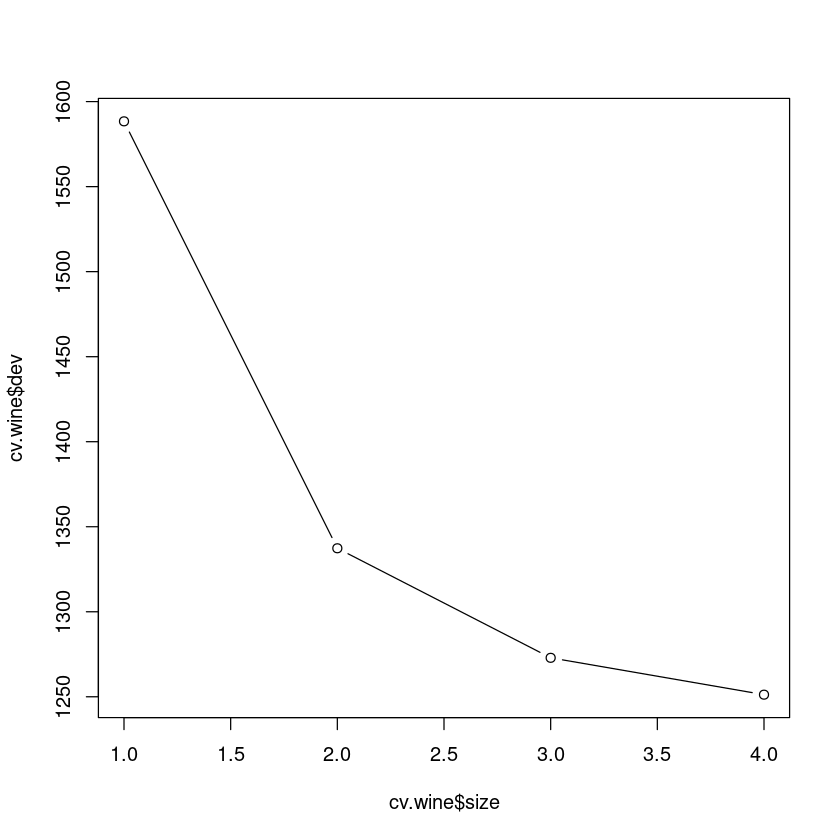

In [142]:
cv.wine <- cv.tree(tree.wine)
plot(cv.wine$size, cv.wine$dev, type = "b")

By using the cv.tree() function, we are technically performing cross-validation to find the optimal tree complexity (using cost-complexity pruning). And looking at the plot above, we can see that the Residual mean deviance is lowest with a node size of 4.

#### Once again, lets see how the model fit onto our data with more outliers:


Regression tree:
tree(formula = quality ~ ., data = train2)
Variables actually used in tree construction:
[1] "alcohol"             "volatile.acidity"    "free.sulfur.dioxide"
Number of terminal nodes:  7 
Residual mean deviance:  0.5706 = 2123 / 3721 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.22700 -0.52940 -0.09113  0.00000  0.47060  2.98000 

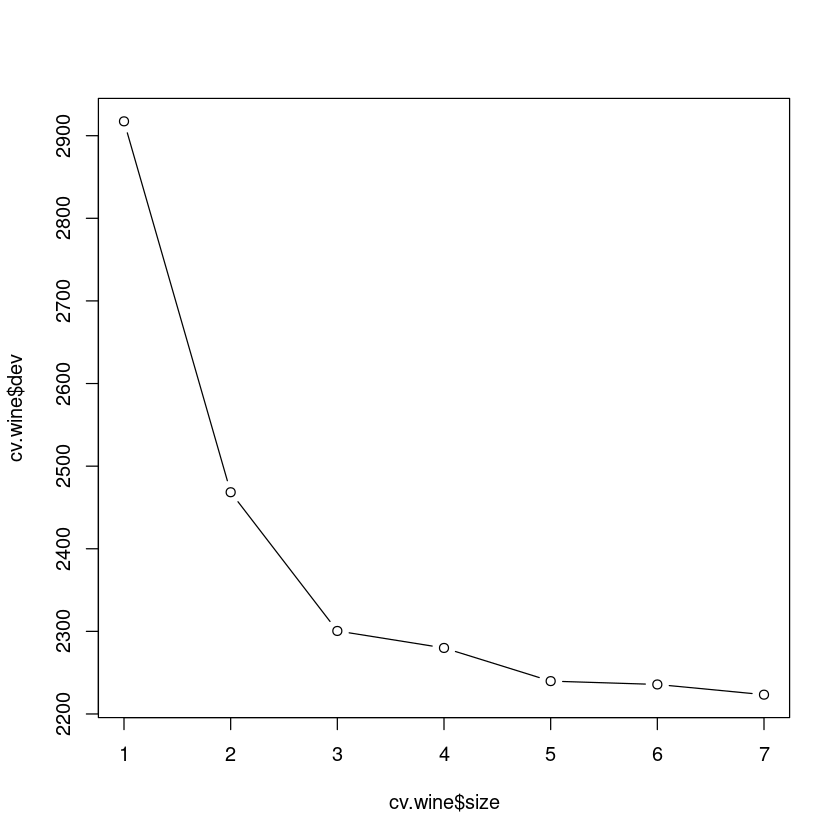

In [118]:
tree.wine  = tree(quality ~ ., train2)
summary(tree.wine)
cv.wine <- cv.tree(tree.wine)
plot(cv.wine$size, cv.wine$dev, type = "b")

- First thing we can notice is that the decision tree contains more nodes nows, as it actually use more predictor than our previous tree. 


- However, similar to what happen to our linear regression model, the Residual mean deviance increased. In this case, it increase from 0.4344 to 0.5706.

### Lastly, we would want to try fitting our data using bagging:

In [119]:
library(randomForest)
set.seed(26)
bag.wine  <- randomForest(quality ~ ., data = train, mtry = 14, importance = TRUE)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


In [120]:
bag.wine


Call:
 randomForest(formula = quality ~ ., data = train, mtry = 14,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 14

          Mean of squared residuals: 0.3721922
                    % Var explained: 33.85

As with bagging, the number of predictors to try for each split are fixed to the total number of predictor avaliable.


And with a number of trees set to 500 by default, we get a Mean of squared residuals of **0.3721**.

In [129]:
# Let test how the number of tree have an effect on the performance of the model:
set.seed(26)
bag.wine  <- randomForest(quality ~ ., data = train, mtry = 14, ntree = 5, importance = TRUE)
bag.wine

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
 randomForest(formula = quality ~ ., data = train, mtry = 14,      ntree = 5, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 5
No. of variables tried at each split: 14

          Mean of squared residuals: 0.5907435
                    % Var explained: -5

In [130]:
set.seed(26)
bag.wine  <- randomForest(quality ~ ., data = train, mtry = 14, ntree = 50, importance = TRUE)
bag.wine

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
 randomForest(formula = quality ~ ., data = train, mtry = 14,      ntree = 50, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 50
No. of variables tried at each split: 14

          Mean of squared residuals: 0.3888872
                    % Var explained: 30.88

From the result above, we can clearly see that as the number of tree increase, the Mean of squared residuals for the model will decrease. However, with the increase of the number of tree, we are sacrificing the interprebility of our model as the model becomes more complex. 

In this case, wether or not we want to choose this model over the over model we tried will depends on the level of interprebility we want our model to have.

#### Similar to what we did above, we will once again try to fit onto the data with more outliers:

In [139]:
library(randomForest)
set.seed(26)
bag.wine  <- randomForest(quality ~ ., data = train2, mtry = 14, importance = TRUE)
bag.wine


Call:
 randomForest(formula = quality ~ ., data = train2, mtry = 14,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 14

          Mean of squared residuals: 0.479629
                    % Var explained: 38.68

Similarly, the outliers in the data have increase the training mse of our model.

# Final selection:


Before finalizing our model choice from the options we've explored, it's crucial to identify our primary objective for this analysis. Given that our prediction problem revolves around predicting wine quality based on various inputs, we can outline two main objectives:

## 1. Understanding Key Factors for High-Quality Wine:
- **Objective:** To gain insights into the relationships between wine characteristics and their quality.
- **Outcome:** The model should help us understand the influential factors contributing to wine quality, aiding in producing higher quality wine.

## 2. Guiding Decision-making in Marketing:
- **Objective:** If predictions are used for wine pricing or marketing strategies.
- **Outcome:** The focus shifts to prediction accuracy rather than interpretability.

For our group, our primary objective aligns with the **first** one mentioned above.

## Model Complexity & Interpretability:
A simpler model might be more desirable if it offers performance comparable to a complex one. Simpler models:
- Are easier to interpret.
- Are more maintainable.
- Generalize better to unseen data.

Given our emphasis on interpretability, **Linear Regression** stands out as our model of choice. Being a parametric model, its simplicity and well-defined functional form enhance its interpretability.

## Side Notes:

- **Predictive Performance:** Linear regression slightly outperforms the decision tree in estimated test error rate and is only marginally outperformed by the bagging model (considering ntree = 500).
- **Robustness:** All three models have limited capability to handle outliers.
- **Computational Cost:** The bagging model, especially with a high number of trees, demands the most computational power and runtime.

### Testing the chosen model on test set

In [26]:
lm.fits = lm(quality_form, data = train)
lm.probs = predict(lm.fits, test)
test_mse = mean((lm.probs - test$quality) ^ 2)
test_mse

[1] 0.4189869

### Testing the chosen model on test set with more outlier

In [28]:
lm.fits = lm(quality_form, data = train2)
lm.probs = predict(lm.fits, test_2)
test_mse = mean((lm.probs - test_2$quality) ^ 2)
test_mse

[1] 0.5352564